# Увеличение покупательской активности клиентов интернет-магазина

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. 

## Цель проекта

**Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.**

Для этого нужно:

1. Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».


2. Собрать данные по клиентам по следующим группам:
* признаки, которые описывают коммуникацию сотрудников компании с клиентом;
* продуктовое поведение покупателя;
* покупательское поведение клиента;
* поведение покупателя на сайте.


3. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.


4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.


5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Описание данных

Файл **`market_file.csv`** содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
* `'id'` — номер покупателя в корпоративной базе данных.
* `'Покупательская активность'` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
* `'Тип сервиса'` — уровень сервиса, например «премиум» и «стандарт».
* `'Разрешить сообщать'` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
* `'Маркет_актив_6_мес'` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
* `'Маркет_актив_тек_мес'` — количество маркетинговых коммуникаций в текущем месяце.
* `'Длительность'` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
* `'Акционные_покупки'` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
* `'Популярная_категория'` — самая популярная категория товаров у покупателя за последние 6 месяцев.
* `'Средний_просмотр_категорий_за_визит'` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
* `'Неоплаченные_продукты_штук_квартал'` — общее число неоплаченных товаров в корзине за последние 3 месяца.
* `'Ошибка_сервиса'` — число сбоев, которые коснулись покупателя во время посещения сайта.
* `'Страниц_за_визит'` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


Файл **`market_money.csv`** содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
* `'id'` — номер покупателя в корпоративной базе данных.
* `'Период'` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
* `'Выручка'` — сумма выручки за период.


Файл **`market_time.csv`** содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
* `'id'` — номер покупателя в корпоративной базе данных.
* `'Период'` — название периода, во время которого зафиксировано общее время.
* `'минут'` — значение времени, проведённого на сайте, в минутах.


Файл **`money.csv`** содержит данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
* `'id'` — номер покупателя в корпоративной базе данных.
* `'Прибыль'` — значение прибыли.

## 1. Загрузка данных

Импортируем необходимые библиотеки, зададим настройки и константы.

In [1]:
!pip install --upgrade scikit-learn -q
!pip install matplotlib==3.5.0 -q

In [2]:
!pip install phik -q
!pip install shap -q

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
import shap
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    LabelEncoder, 
    PolynomialFeatures)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    precision_score,
    recall_score,
    accuracy_score,
    confusion_matrix,
    precision_recall_curve)
from phik.report import plot_correlation_matrix

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

sns.set_style('whitegrid')

RANDOM_STATE = 42
TEST_SIZE = 0.25

Загрузим файлы с данными.

In [4]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [5]:
def info_df(df):
    '''
    Выводит основную информацию о датафрейме
    '''
    display(df.head(10))
    print('*'*50, '\n')
    display(df.info())
    print('*'*50, '\n')
    print('Количество пропущенных значений:\n', df.isna().sum(), '\n')
    print('*'*50, '\n')
    print('Количество явных дубликатов:', df.duplicated().sum())

In [6]:
info_df(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 n

None

************************************************** 

Количество пропущенных значений:
 id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64 

************************************************** 

Количество явных дубликатов: 0


**В первом датафрейме** содержится 1300 строк и 13 столбцов и представленны данные:
* о коммуникациях с покупателем ('Тип сервиса', 'Разрешить сообщать', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность');
* o продуктовом поведении покупателя ('Популярная_категория', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал');
* о поведении покупателя на сайте ('Ошибка_сервиса', 'Страниц_за_визит').

Данные в таблице соответствуют описанию.

Проущенных значений нет.

Явных дубликатов не выявлено.

Типы данных верные.

Нужно переименовать столбцы и привести их к единому виду.

In [7]:
info_df(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

************************************************** 

Количество пропущенных значений:
 id         0
Период     0
Выручка    0
dtype: int64 

************************************************** 

Количество явных дубликатов: 0


**Во втором датафрейме** содержится 3900 строк и 3 столбца и представленны данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

Данные в таблице соответствуют описанию.

Проущенных значений нет.

Явных дубликатов не выявлено.

Типы данных верные.

In [8]:
info_df(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

************************************************** 

Количество пропущенных значений:
 id        0
Период    0
минут     0
dtype: int64 

************************************************** 

Количество явных дубликатов: 0


**В третьем датафрейме** содержится 2600 строк и 3 столбца и представленны данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

Данные в таблице соответствуют описанию.

Проущенных значений нет.

Явных дубликатов не выявлено.

Типы данных верные.

Нужно привести столбцы к единому виду.

In [9]:
info_df(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

************************************************** 

Количество пропущенных значений:
 id         0
Прибыль    0
dtype: int64 

************************************************** 

Количество явных дубликатов: 0


**В четвертом датафрейме** содержится 1300 строк и 2 столбца и представленны данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Данные в таблице соответствуют описанию.

Проущенных значений нет.

Явных дубликатов не выявлено.

Типы данных верные.

## 2. Предобработка данных

Переименуем столбцы и приведем их к единому виду.

In [10]:
market_file.columns=market_file.columns.str.replace(' ', '_').str.lower()
display(market_file.columns)
market_money.columns=market_money.columns.str.lower()
display(market_money.columns)
market_time.columns=market_time.columns.str.lower()
display(market_time.columns)
money.columns=money.columns.str.lower()
display(money.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')

Index(['id', 'период', 'выручка'], dtype='object')

Index(['id', 'период', 'минут'], dtype='object')

Index(['id', 'прибыль'], dtype='object')

Выше мы проверили данные на пропуски и явные дубликаты - они отсутствуют. Проверим данные на наличие неявных дубликатов.

**`market_file`**

In [11]:
for i in market_file.columns:
    if market_file[i].dtype == 'object':
        print(f'{i}: {market_file[i].unique()}')

покупательская_активность: ['Снизилась' 'Прежний уровень']
тип_сервиса: ['премиум' 'стандартт' 'стандарт']
разрешить_сообщать: ['да' 'нет']
популярная_категория: ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


В столбце `'тип_сервиса'` удалим неявные дубликаты, заменив значение 'стандартт' на 'стандарт'. В столбце `'популярная_категория'` исправим ошибку в значении 'Косметика и аксесуары' на 'Косметика и аксессуары'.

In [12]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [13]:
market_file['популярная_категория'] = market_file['популярная_категория'].replace('Косметика и аксесуары', 
                                                                                  'Косметика и аксессуары')
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксессуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

**`market_money`**

In [14]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Неявных дубликатов нет.

**`market_time`**

In [15]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Неявных дубликатов нет, но есть ошибка в значении 'предыдцщий_месяц'. Исправим ее.

In [16]:
market_time['период'] = market_time['период'].str.replace('дц', 'ду')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

### Вывод:

Проведена предобработка данных:
* типы данных верные;
* были переименованы столбцы и приведены к единому стилю написания;
* пропущенных значений не выявлено;
* явных дубликатов не выявлено;
* были выявлены и удалены неявные дубликаты в датафрейме `market_file` в столбце `'тип_сервиса'`, а также исправлены орфографические ошибки в написании некоторых значений.

## 3. Исследовательский анализ данных

In [17]:
def numerical_plot(data, title_1, xlabel, title_2, option=1):
    '''
    Строит гистограмму для непрерывных признаков (option=1) или
    столбчатую диаграмму для дискретных признаков (option=2) 
    и диаграмму размаха  по заданным параметрам
    ''' 
    f, ax = plt.subplots(1, 2, figsize=(16,6))
    
    if option == 1:
        sns.histplot(data, bins=30, ax=ax[0], kde=True)
        ax[0].vlines(x=data.mean(), colors='red', ymin=0, ymax=1, transform=ax[0].get_xaxis_transform(), 
                     lw=3, label='Среднее')
        ax[0].vlines(x=data.median(), colors='green', ymin=0, ymax=1, transform=ax[0].get_xaxis_transform(), 
                     lw=3, label='Медиана')
        ax[0].set_title(title_1)
        ax[0].set_xlabel(xlabel)
        ax[0].set_ylabel('Количество')
        ax[0].legend()
        
    if option == 2:
        sns.countplot(data, ax=ax[0], color='#1f77b4', alpha=0.7)
        ax[0].set_title(title_1)
        ax[0].set_xlabel(xlabel)
        ax[0].set_ylabel('Количество') 
        
        for p in ax[0].patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax[0].text(x+width/2, 
                       y+height*1.02, 
                       int(height), 
                       horizontalalignment='center', 
                       verticalalignment='center',
                       fontsize=12)    
    
    ax[1].boxplot(data, vert=False)
    ax[1].set_title(title_2)
    ax[1].set_xlabel(xlabel)
        
    plt.show()
    
def categoriсal_plot(data, title, ylabel):
    '''
    Строит столбчатую диаграмму для дискретных количественных признаков и категориальных признаков 
    по заданным параметрам
    ''' 
    ax = data.value_counts().plot(kind='barh', grid=True, figsize=(12, 5), alpha=0.7)
    plt.title(title)
    plt.xlabel('Количество')
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                int(width), 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=15)
    
    plt.show()
    
    print(data.value_counts(normalize=True, ascending=True).map(lambda x: '{:,.2%}'.format(x)))

### 3.1. Анализ количественных признаков

**`market_file`**

In [18]:
market_file_num_cols_names = market_file.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
market_file[market_file_num_cols_names].describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


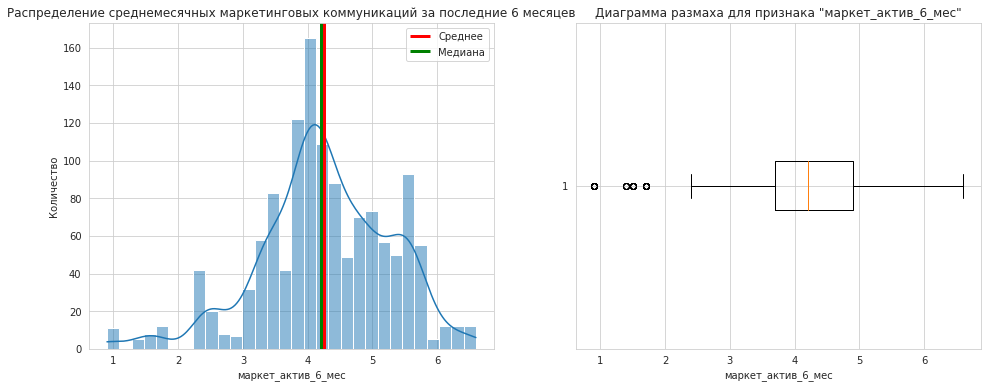

In [19]:
numerical_plot(
    market_file['маркет_актив_6_мес'], 
    'Распределение среднемесячных маркетинговых коммуникаций за последние 6 месяцев', 
    'маркет_актив_6_мес', 
    'Диаграмма размаха для признака "маркет_актив_6_мес"')

Распределение несимметричное (со смещением вправо), есть выбросы за пределами первого квартиля, но низкие значения коммуникаций  являются вполне обычными, поэтому удалять их не будем. Значения находятся в диапазоне от 0.9 до 6.6. Среднее и медиана практически совпадают (4.25 и 4.20 соответственно).

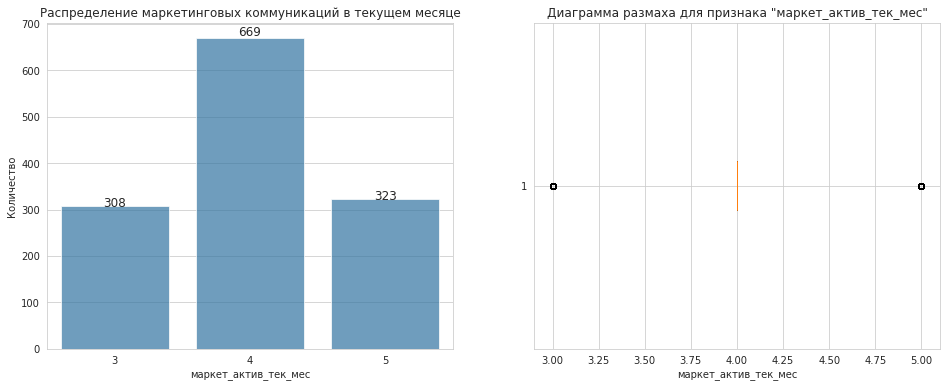

In [20]:
numerical_plot(
    market_file['маркет_актив_тек_мес'], 
    'Распределение маркетинговых коммуникаций в текущем месяце', 
    'маркет_актив_тек_мес', 
    'Диаграмма размаха для признака "маркет_актив_тек_мес"', option=2)

Данные распределены между тремя значениями (3; 4 и 5). Мода, среднее и медиана совпадают и составляют 4 маркетинговых коммуникации.

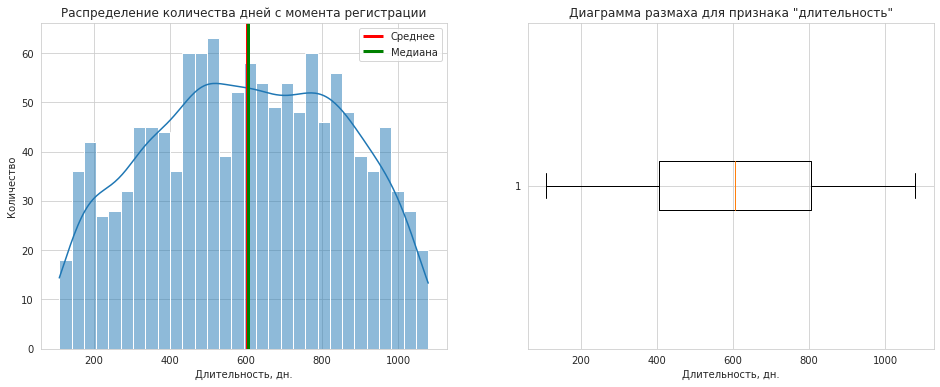

In [21]:
numerical_plot(
    market_file['длительность'], 
    'Распределение количества дней с момента регистрации', 
    'Длительность, дн.', 
    'Диаграмма размаха для признака "длительность"')

Распределение больше похоже на равномерное: вероятнее всего на сайте каждый день регистрируется примерно одинаковое количество пользователей. Среднее и медиана практически совпадают и составляют 602 и 606 дней соответственно.

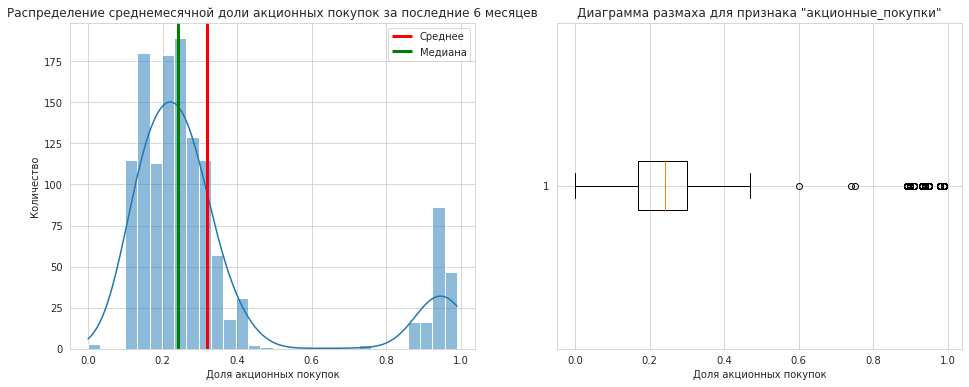

In [22]:
numerical_plot(
    market_file['акционные_покупки'], 
    'Распределение среднемесячной доли акционных покупок за последние 6 месяцев', 
    'Доля акционных покупок', 
    'Диаграмма размаха для признака "акционные_покупки"')

Распределение бимодальное. Второй пик находится около 1, что говорит о том, что есть группа клиентов, которые покупают в основном акционные товары. Эти значения лежат за пределами третьего квартиля, удалять их не будем. Среднее и медиана не совпадают и составляют 0.32 и 0.24 соответственно.

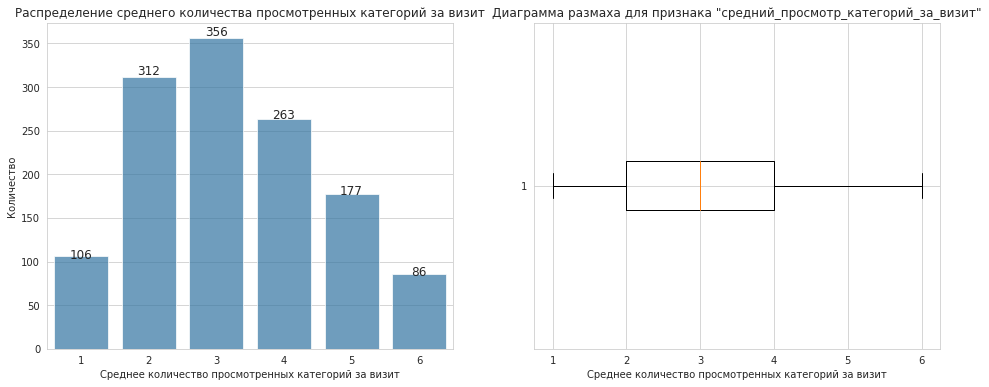

In [23]:
numerical_plot(
    market_file['средний_просмотр_категорий_за_визит'], 
    'Распределение среднего количества просмотренных категорий за визит', 
    'Среднее количество просмотренных категорий за визит', 
    'Диаграмма размаха для признака "средний_просмотр_категорий_за_визит"', option=2)

Данные распределены между целочисленными значениями от 1 до 6 категорий. Среднее и медиана составляют 3.3 и 3 категории соответственно.

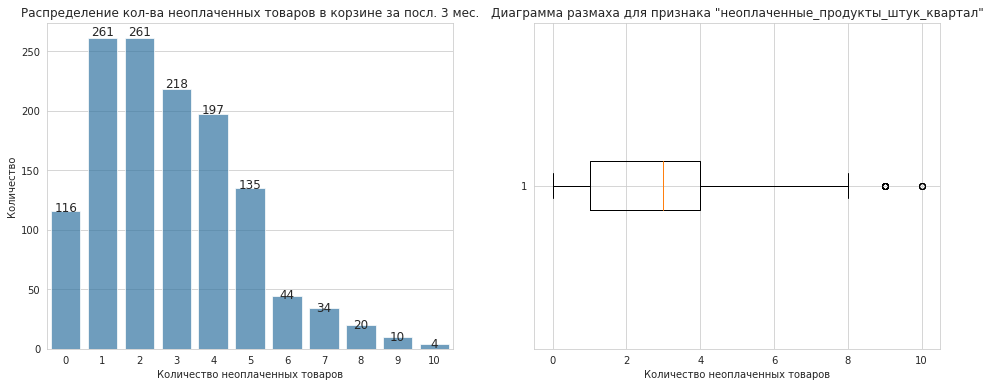

In [24]:
numerical_plot(
    market_file['неоплаченные_продукты_штук_квартал'], 
    'Распределение кол-ва неоплаченных товаров в корзине за посл. 3 мес.', 
    'Количество неоплаченных товаров', 
    'Диаграмма размаха для признака "неоплаченные_продукты_штук_квартал"', option=2)

Данные распределены между целочисленными значениями от 0 до 10 товаров. Значения за пределами 3 квартиля (9 и 10 товаров) удалять не будем, они являются вполне нормальными. Среднее и медиана составляют 2.84 и 3 товара соответственно.

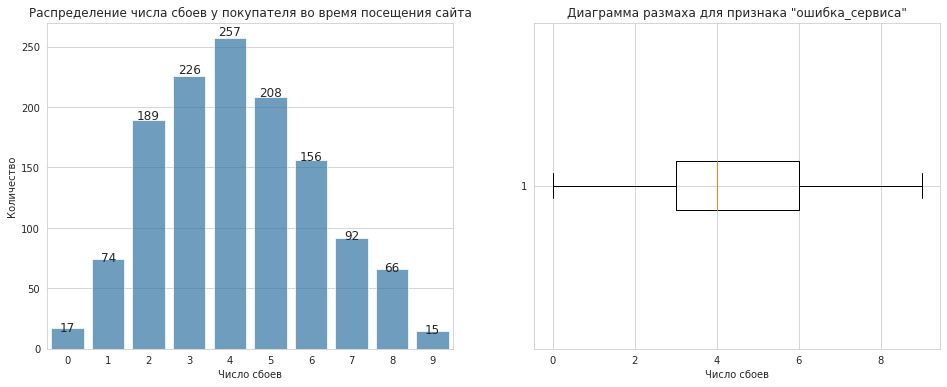

In [25]:
numerical_plot(
    market_file['ошибка_сервиса'], 
    'Распределение числа сбоев у покупателя во время посещения сайта', 
    'Число сбоев', 
    'Диаграмма размаха для признака "ошибка_сервиса"', option=2)

Данные распределены между значениями от 0 до 9 сбоев. Среднее и медиана составляют 4.2 и 4 сбоя соответственно.

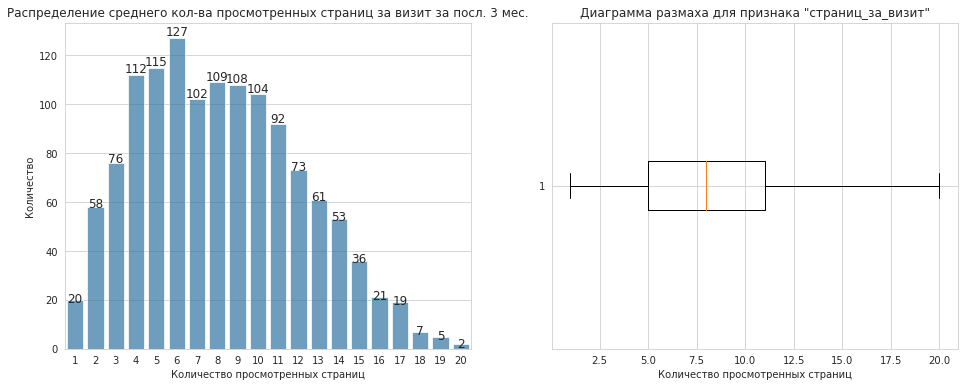

In [26]:
numerical_plot(
    market_file['страниц_за_визит'], 
    'Распределение среднего кол-ва просмотренных страниц за визит за посл. 3 мес.', 
    'Количество просмотренных страниц', 
    'Диаграмма размаха для признака "страниц_за_визит"', option=2)

Значения лежат в диапазоне от 1 до 20 страниц. Среднее и медиана составили 8.2 и 8 страниц соответственно.

**`market_money`**

В датасете `market_money` количественным признаком является `'выручка'`.

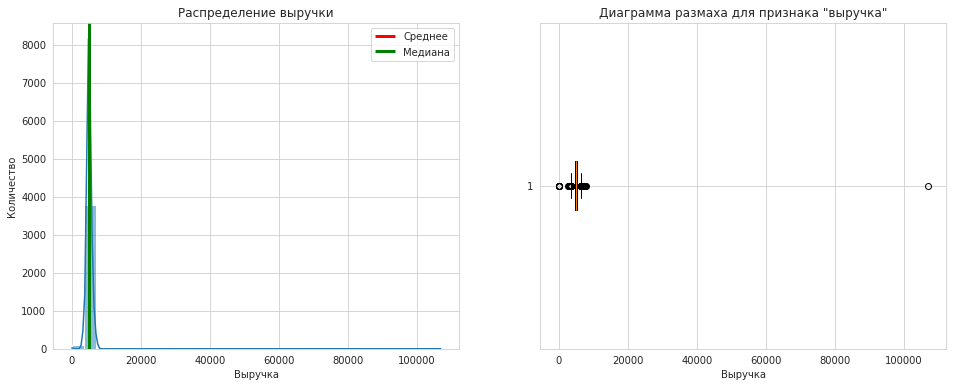

In [27]:
numerical_plot(
    market_money['выручка'], 
    'Распределение выручки', 
    'Выручка', 
    'Диаграмма размаха для признака "выручка"')

Виден выброс со значением более 100000.

In [28]:
market_money.query('выручка > 100000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [29]:
market_money.query('id == 215380')

,id,период,выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


Видно что в двух других месяцах средняя выручка по этому покупателю составляла 5 и 6 тыс. Значение в 106862.2 явно выделяется. Но, так как мы не знаем, ошибочное ли это значение или этот клиент действительно купил товар на такую сумму, лучше удалить этого покупателя из таблицы.

In [30]:
id_to_drop = market_money.query('id == 215380 and период == "текущий_месяц"')['id'].tolist()
id_to_drop

[215380]

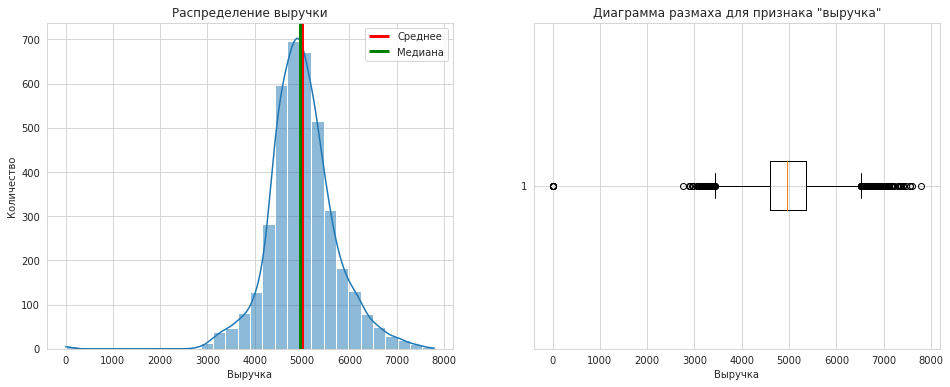

In [31]:
numerical_plot(
    market_money.query('id != @id_to_drop')['выручка'], 
    'Распределение выручки', 
    'Выручка', 
    'Диаграмма размаха для признака "выручка"')

In [32]:
market_money.query('id != @id_to_drop')['выручка'].describe()

count    3897.000000
mean     4999.287760
std       706.970089
min         0.000000
25%      4590.000000
50%      4956.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

Распределение нормальное, значения лежат в диапазоне от 0 до 7800. Среднее и медиана близки и составляют примерно 5000. По диаграмме размаха видны выбросы. Значения в пределах 2000 - 7800 оставим, так как их довольно много и они являются вполне нормальными. 

Нулевые значения выручки нужно будет удалить, чтобы отобрать клиентов с покупательской активностью не менее трёх месяцев. Для этого отберем значения выручки, равные нулю и добавим отобранные `'id'` в список `id_to_drop`.

In [33]:
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [34]:
for i in market_money.query('выручка == 0')['id']:
    if i not in id_to_drop:
        id_to_drop.append(i)
id_to_drop

[215380, 215348, 215357, 215359]

Посмотрим выручку в разрезе каждого периода.

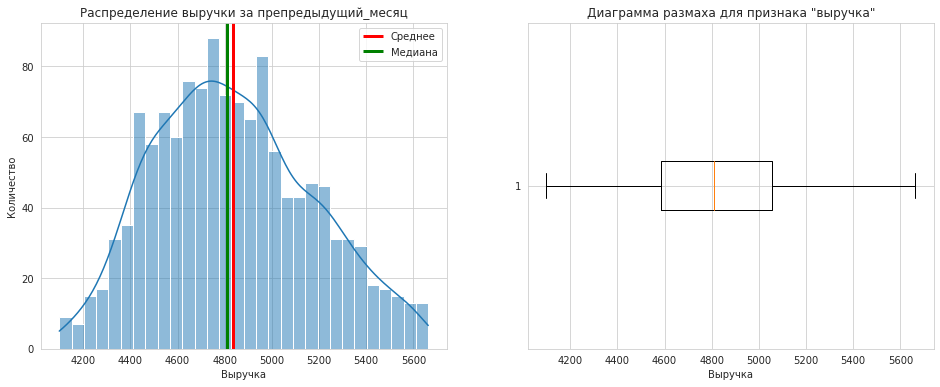

count    1296.000000
mean     4836.202160
std       333.514091
min      4098.000000
25%      4584.500000
50%      4810.500000
75%      5056.000000
max      5663.000000
Name: выручка, dtype: float64


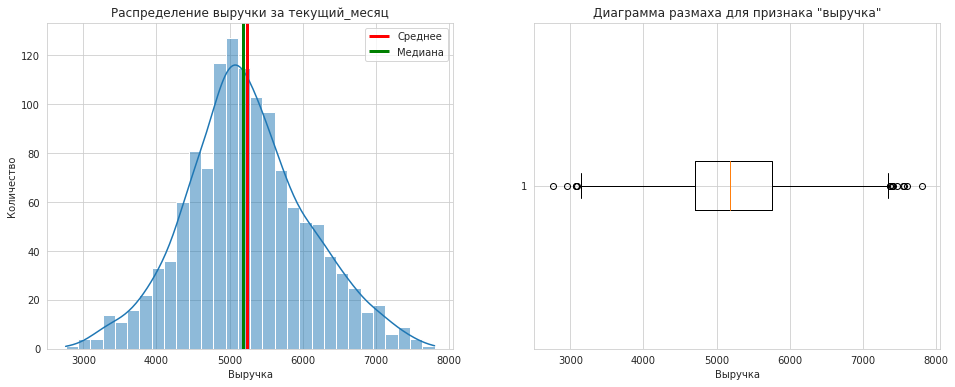

count    1296.000000
mean     5238.096065
std       834.318717
min      2758.700000
25%      4706.050000
50%      5179.950000
75%      5759.275000
max      7799.400000
Name: выручка, dtype: float64


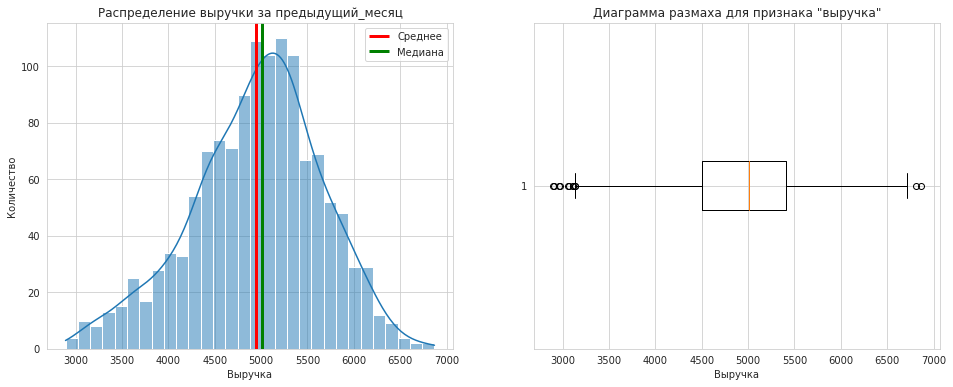

count    1296.000000
mean     4947.468750
std       700.797239
min      2890.000000
25%      4498.125000
50%      5005.500000
75%      5405.625000
max      6869.500000
Name: выручка, dtype: float64


In [35]:
for i in market_money['период'].unique():
    numerical_plot(
        market_money.query('id != @id_to_drop and период == @i')['выручка'], 
        f'Распределение выручки за {i}', 
        'Выручка', 
        'Диаграмма размаха для признака "выручка"')
    print(market_money.query('id != @id_to_drop and период == @i')['выручка'].describe())

Виден прирост средней и медианной выручки к текущему месяцу (примерно от 4800 до 5200).

**`market_time`**

В датасете `market_time` количественным признаком является `'минут'`.

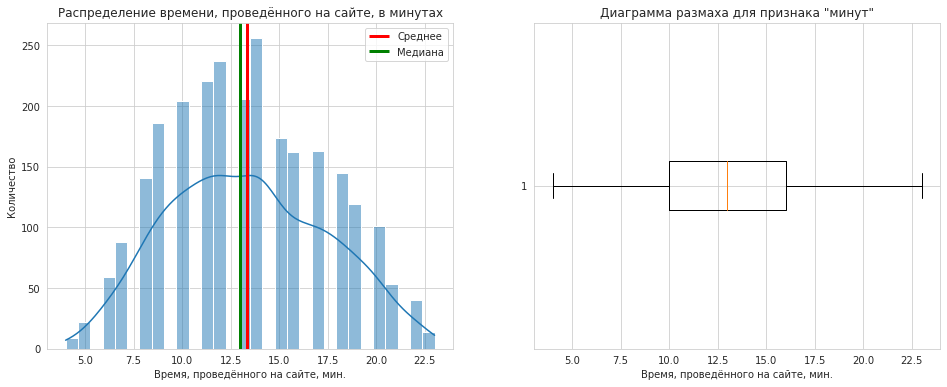

In [36]:
numerical_plot(
    market_time['минут'], 
    'Распределение времени, проведённого на сайте, в минутах', 
    'Время, проведённого на сайте, мин.', 
    'Диаграмма размаха для признака "минут"')

In [37]:
market_time['минут'].describe()

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

Распределение стремится к нормальному. Значения лежат в диапазоне от 4 до 23 минут. Среднее и медиана близки (13.3 и 13 мин. соответственно).

Посмотрим на распределение времени в разрезе каждого периода.

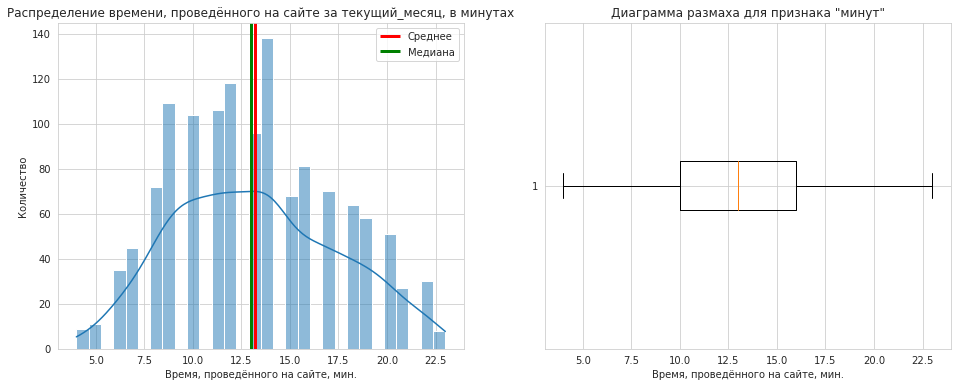

count    1300.000000
mean       13.204615
std         4.220589
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


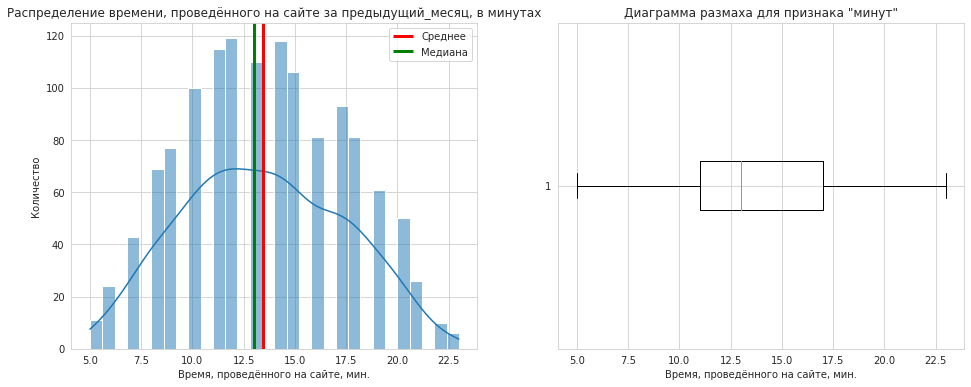

count    1300.000000
mean       13.467692
std         3.932029
min         5.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        23.000000
Name: минут, dtype: float64


In [38]:
for i in market_time['период'].unique():
    numerical_plot(
        market_time.query('период == @i')['минут'], 
        f'Распределение времени, проведённого на сайте за {i}, в минутах', 
        'Время, проведённого на сайте, мин.', 
        'Диаграмма размаха для признака "минут"')
    print(market_time.query('период == @i')['минут'].describe())

Видим, что в разрезе периодов распределение времени примерно одинаково.

**`money`**

В датасете `money` количественным признаком является `'прибыль'`.

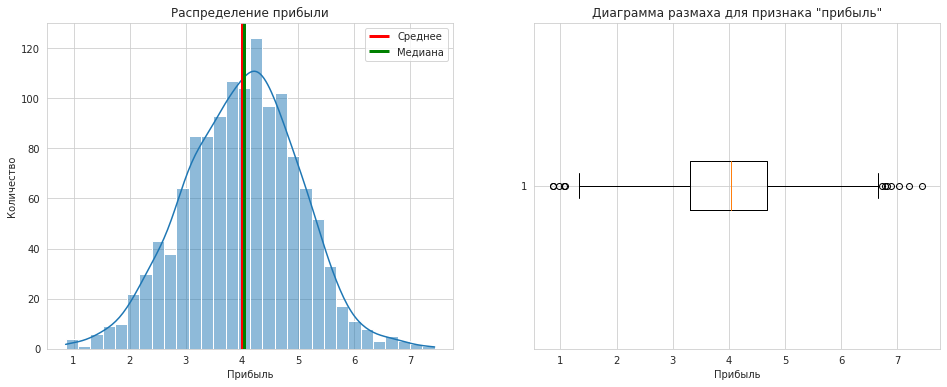

In [39]:
numerical_plot(
    money['прибыль'], 
    'Распределение прибыли', 
    'Прибыль', 
    'Диаграмма размаха для признака "прибыль"')

In [40]:
money['прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

Распределение нормальное, значения лежат в диапазоне от 0.86 до 7.43. Среднее и медиана близки и составляют примерно 4.

### 3.2. Анализ категориальных признаков

**`market_file`**

In [41]:
market_file_cat_cols_names = market_file.select_dtypes(exclude='number').columns.tolist()
market_file_cat_cols_names

['покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'популярная_категория']

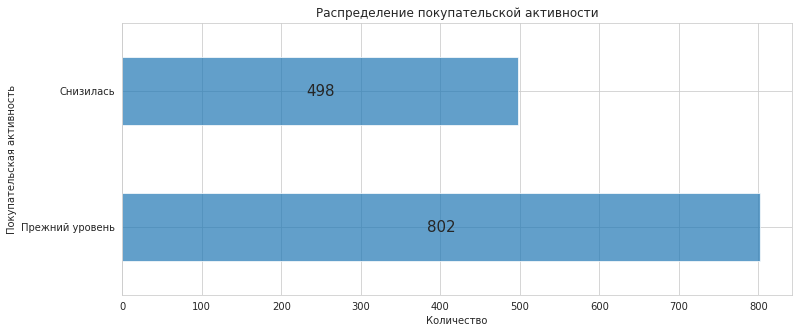

Снизилась          38.31%
Прежний уровень    61.69%
Name: покупательская_активность, dtype: object


In [42]:
categoriсal_plot(market_file['покупательская_активность'], 'Распределение покупательской активности',
                 'Покупательская активность')

Покупательская активность - это целевой признак. Видно, что данных в категории 'Прежний уровень' значительно больше, чем в категории 'Снизилась'. Это говорит о дисбалансе в данных, нужно будет это учесть в дальнейшем.

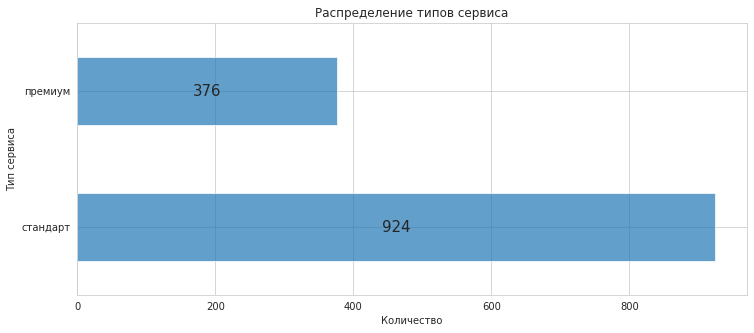

премиум     28.92%
стандарт    71.08%
Name: тип_сервиса, dtype: object


In [43]:
categoriсal_plot(market_file['тип_сервиса'], 'Распределение типов сервиса', 'Тип сервиса')

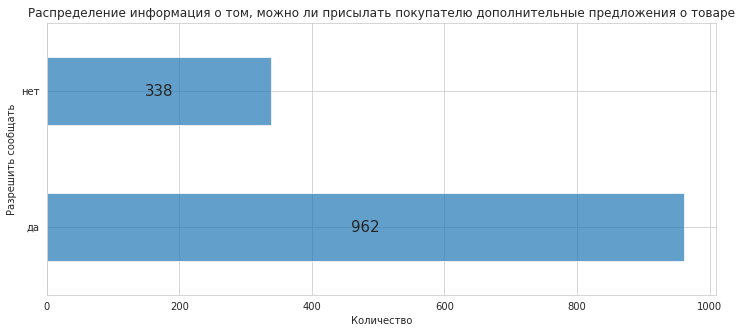

нет    26.00%
да     74.00%
Name: разрешить_сообщать, dtype: object


In [44]:
categoriсal_plot(
    market_file['разрешить_сообщать'], 
    'Распределение информация о том, можно ли присылать покупателю дополнительные предложения о товаре', 
    'Разрешить сообщать')

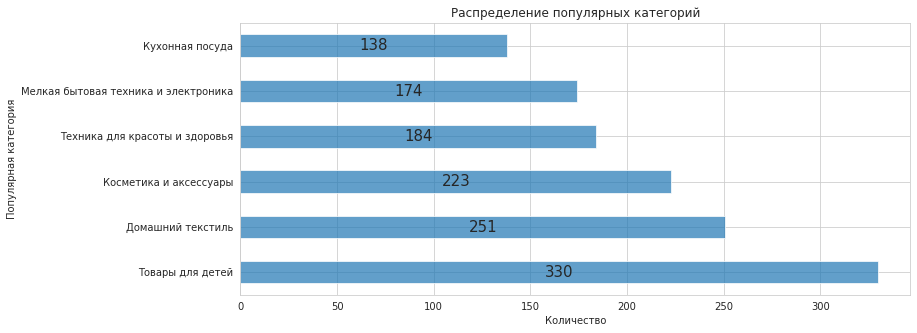

Кухонная посуда                         10.62%
Мелкая бытовая техника и электроника    13.38%
Техника для красоты и здоровья          14.15%
Косметика и аксессуары                  17.15%
Домашний текстиль                       19.31%
Товары для детей                        25.38%
Name: популярная_категория, dtype: object


In [45]:
categoriсal_plot(market_file['популярная_категория'], 'Распределение популярных категорий',
                 'Популярная категория')

Категориальные признаки в датафреймах `market_money` и `market_time` можно не рассматривать, так как там содержатся данные о периодах, по которым зафиксированы значения по каждому покупателю и они все составляют по 1300 значений в каждой категории.

### 3.3. Отбор клиентов с покупательской активностью не менее трёх месяцев

Ранее мы отобрали `'id'` покупателей, которых нужно удалить. Они содержатся в списке `id_to_drop`.

In [46]:
market_file = market_file.query('id != @id_to_drop')
market_money = market_money.query('id != @id_to_drop')
market_time = market_time.query('id != @id_to_drop')
money = money.query('id != @id_to_drop')

### Вывод:

Мы провели исследовательский анализ данных, в ходе которого изучили количественные и категориальные признаки. Можно выделить следующее:
* **по количественным признакам**:
    * Значения среднемесячных маркетинговых коммуникаций за последние 6 месяцев (`'маркет_актив_6_мес'`): от 0.9 до 6.6, в среднем - 4.20;
    * Значения маркетинговых коммуникаций в текущем месяце (`'маркет_актив_тек_мес'`) распределены между тремя значениями (3; 4 и 5). Мода, среднее и медиана совпадают и составляют 4 маркетинговых коммуникации;
    * Распределение количества дней с момента регистрации (`'длительность'`) похоже на равномерное: вероятнее всего на сайте каждый день регистрируется примерно одинаковое количество пользователей. Среднее и медиана практически совпадают и составляют около 600 дней;
    * Распределение среднемесячной доли акционных покупок за последние 6 месяцев (`'акционные_покупки'`) бимодальное. Первый пик приходится на долю 0.2, второй пик на долю, близкую к 1, что говорит о том, что есть группа клиентов, которые покупают в основном акционные товары. Среднее и медиана не совпадают и составляют 0.32 и 0.24 соответственно;
    * Значения среднего количества просмотренных категорий за визит (`'средний_просмотр_категорий_за_визит'`): от 1 до 6 категорий, в среднем - 3 категории;
    * Значения количества неоплаченных товаров в корзине за посл. 3 мес. (`'неоплаченные_продукты_штук_квартал'`): от 0 до 10 товаров, в среднем - 3 товара;
    * Значения числа сбоев у покупателя во время посещения сайта (`'ошибка_сервиса'`): от 0 до 9 сбоев, в среднем - 4 сбоя;
    * Значения среднего количества просмотренных страниц за визит за последние 3 месяца (`'страниц_за_визит'`): от 1 до 20 страниц, в среднем - 8 страниц;
    * Значения признака `'выручка'` лежат в диапазоне от 0 до 7800, в среднем - 5000. Был удален выброс со значением 106862.2. В разрезе периодов виден прирост выручки к текущему месяцу (средняя выручка выросла от 4800 до 5200);
    * Значения времени, проведённого на сайте, в минутах (`'минут'`): от 4 до 23 минут, в среднем - 13 минут;
    * Значения признака `'прибыль'`: от 0.86 до 7.43, в среднем - 4.
* **по категориальным признакам**:
    * Имеется дисбаланс в данных по целевому признаку `'покупательская_активность'` (Снизилась - 38%; Прежний уровень - 62%);
    * Признак `'тип_сервиса'`: премиум - 29%; стандарт - 71%;
    * Распределение информация о том, можно ли присылать покупателю дополнительные предложения о товаре (`'разрешить_сообщать'`): нет - 26%; да - 74%;
    * Признак `'популярная_категория'` распределен между шестью категориями, самая популярная - товары для детей (25%).

Также были отобраны клиенты, покупательская активность которых составила не менее трёх месяцев.

## 4. Объединение таблиц

Преобразуем данные датафреймов `market_money` и `market_time`, сгруппировав данные по периодам.

In [47]:
market_money_grouped = (market_money
    .pivot_table(index='id', columns='период', values='выручка')
    .add_prefix('выручка_')
    .reindex(columns=['выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']))
market_money_grouped.head()

период,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц
id,,,
215349,4472.0,5216.0,4971.6
215350,4826.0,5457.5,5058.4
215351,4793.0,6158.0,6610.4
215352,4594.0,5807.5,5872.5
215353,5124.0,4738.5,5388.5


In [48]:
market_time_grouped = (market_time
    .pivot_table(index='id', columns='период', values='минут')
    .add_prefix('минут_'))
market_time_grouped.head()

период,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10


Объединим таблицы `market_file`, `market_money_grouped` и `market_time_grouped`.

In [49]:
market = market_file.set_index('id').join([market_money_grouped, market_time_grouped], how='left')
market.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10


In [50]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

Данные датафреймов успешно объединены в одну таблицу по общему столбцу `'id'`.

In [51]:
print(f'До объединения:\nРазмерность датафрейма market_money_grouped: {market_money_grouped.shape}')
print(f'Размерность датафрейма market_time_grouped: {market_time_grouped.shape}')
print('Размерность датафрейма market_file:', market_file.set_index('id').shape)
print(f'После объединения:\nРазмерность датафрейма market: {market.shape}')

До объединения:
Размерность датафрейма market_money_grouped: (1296, 3)
Размерность датафрейма market_time_grouped: (1296, 2)
Размерность датафрейма market_file: (1296, 12)
После объединения:
Размерность датафрейма market: (1296, 17)


## 5. Корреляционный анализ

Построим матрицу корреляции $\phi_K$.

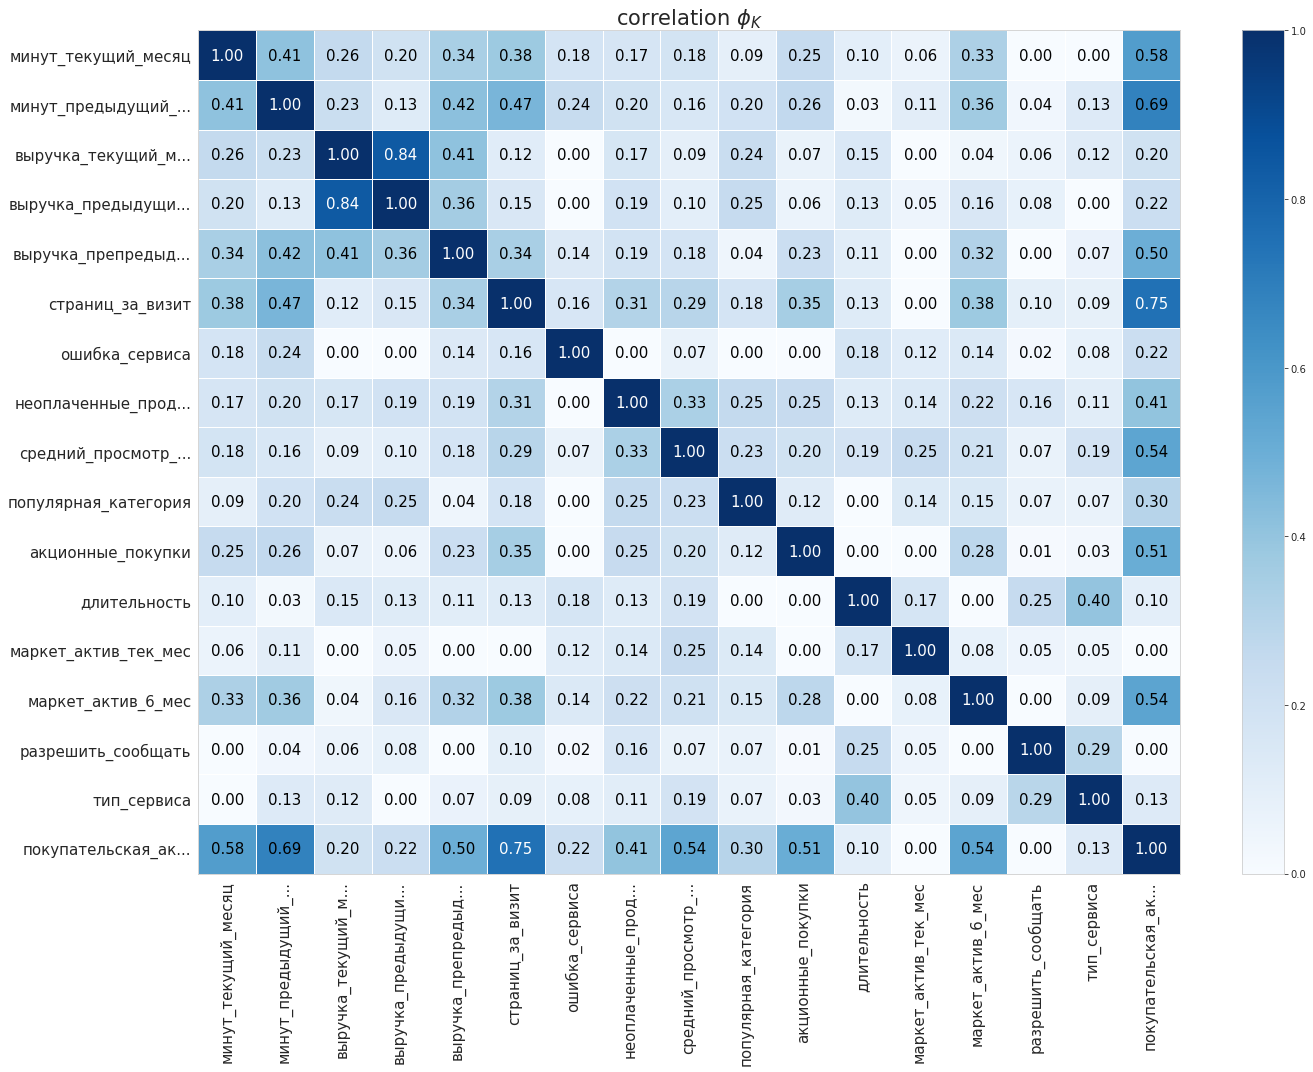

In [52]:
#interval_cols = market.select_dtypes(include='number').columns.tolist()
interval_cols = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'выручка_препредыдущий_месяц',
                 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 
                 'минут_текущий_месяц']
phik_overview = market.phik_matrix(interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels = phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20,15)
)

In [55]:
correlation_coef = round(phik_overview['покупательская_активность'][1:], 2).sort_values(ascending=False)
correlation_coef

страниц_за_визит                       0.75
минут_предыдущий_месяц                 0.69
минут_текущий_месяц                    0.58
маркет_актив_6_мес                     0.54
средний_просмотр_категорий_за_визит    0.54
акционные_покупки                      0.51
выручка_препредыдущий_месяц            0.50
неоплаченные_продукты_штук_квартал     0.41
популярная_категория                   0.30
ошибка_сервиса                         0.22
выручка_предыдущий_месяц               0.22
выручка_текущий_месяц                  0.20
тип_сервиса                            0.13
длительность                           0.10
разрешить_сообщать                     0.00
маркет_актив_тек_мес                   0.00
Name: покупательская_активность, dtype: float64

Можно сделать следующие выводы о корреляции между целевым признаком `'покупательская_активность'` и входными признаками:
* **высокая корреляция** с признаком `'страниц_за_визит'` (коэф. корреляции - 0.75);
* **заметная корреляция** с признаками `'минут_предыдущий_месяц'` (0.69), `'минут_текущий_месяц'` (0.58), `'средний_просмотр_категорий_за_визит'` (0.54), `'маркет_актив_6_мес'` (0.54),  `'акционные_покупки'` (0.51), `'выручка_препредыдущий_месяц'` (0.50);
* **умеренная корреляция** с признаками `'неоплаченные_продукты_штук_квартал'` (0.41),`'популярная_категория'` (0.30);
* **слабая корреляция** с признаками `'выручка_предыдущий_месяц'` (0.22), `'ошибка_сервиса'` (0.22), `'выручка_текущий_месяц'` (0.20), `'тип_сервиса'` (0.13), `'длительность'` (0.10);
* **корреляция отсутствует** с признаками `'маркет_актив_тек_мес'` и `'разрешить_сообщать'`.

**Мультиколлинеарности** между входными признаками не наблюдается, так как все абсолютные значения коэффициентов корреляции меньше 0.9.

Посмотрим на распределение признаков с высокой и умеренной корреляцией (>= 0.3)   в зависимости от класса целевого признака `'покупательская_активность'`.

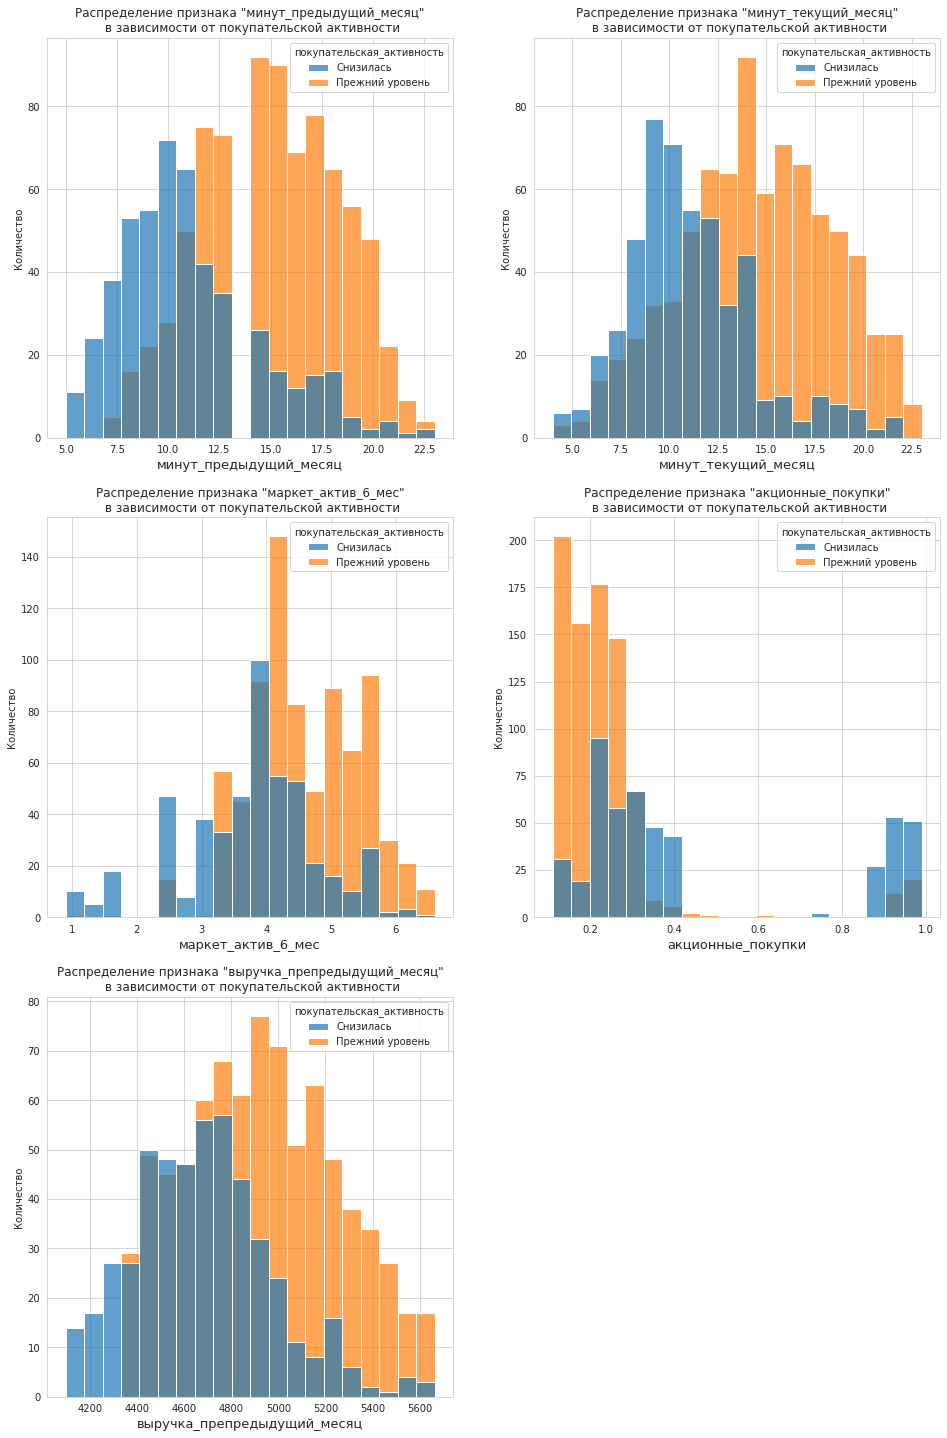

In [56]:
#high_correlation = correlation_coef.loc[correlation_coef.values >= 0.3].index.tolist()
high_correlation_cont = ['минут_предыдущий_месяц', 'минут_текущий_месяц', 'маркет_актив_6_мес', 'акционные_покупки',
                    'выручка_препредыдущий_месяц']
high_correlation_discr = ['страниц_за_визит', 'средний_просмотр_категорий_за_визит', 
                          'неоплаченные_продукты_штук_квартал', 'популярная_категория']
plt.figure(figsize=(16, 25))
for i, feature in enumerate(high_correlation_cont, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=market, x=feature, bins=20, hue='покупательская_активность', alpha=0.7)
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Количество')
    plt.title(f'Распределение признака "{feature}"\n в зависимости от покупательской активности')

plt.show()

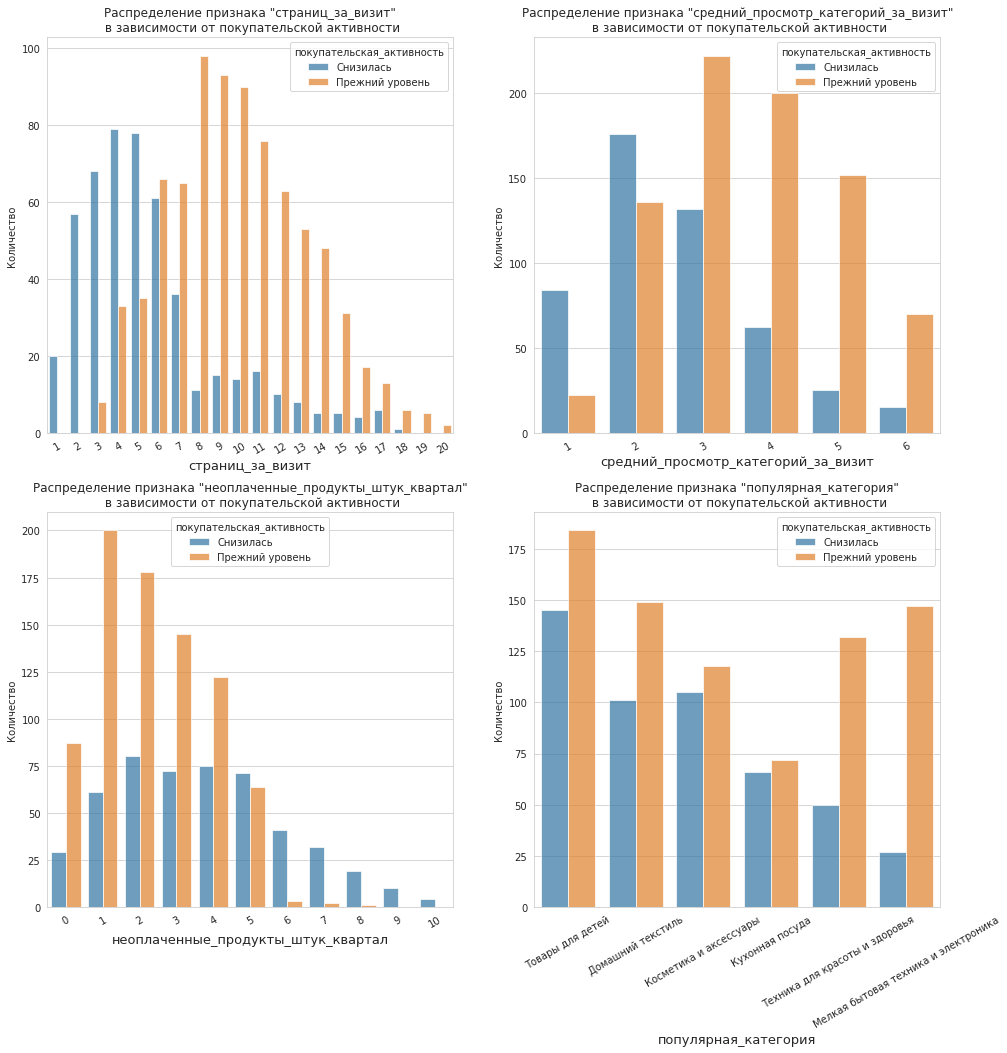

In [57]:
plt.figure(figsize=(16, 16))
for i, feature in enumerate(high_correlation_discr, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=market, x=feature, hue='покупательская_активность', alpha=0.7)
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Количество')
    plt.title(f'Распределение признака "{feature}"\n в зависимости от покупательской активности')
    plt.xticks(rotation=30)

plt.show()

Из полученных данных видно, что покупатели с прежним уровнем активности:
* чаще просматривают больше страниц за визит;
* чаще проводят больше минут на сайте;
* чаще имеют большее количество среднемесячных маркетинговых коммуникаций;
* реже интересуются акционными товарами;
* имеют меньшее количество неоплаченных продуктов в корзине;
* чаще покупают товары из категорий: товары для детей, домашний текстиль и мелкую бытовую технику и электронику.

### Вывод:

Сильнее всего целевой признак `'покупательская_активность'` коррелирует:
* с признаком `'страниц_за_визит'` (коэф. корреляции - 0.75 (**высокая корреляция**));
* с признаками `'минут_предыдущий_месяц'` (0.69), `'минут_текущий_месяц'` (0.58), `'средний_просмотр_категорий_за_визит'` (0.54), `'маркет_актив_6_мес'` (0.54),  `'акционные_покупки'` (0.51), `'выручка_препредыдущий_месяц'` (0.50) (**заметная корреляция**);
* с признаками `'неоплаченные_продукты_штук_квартал'` (0.41), `'популярная_категория'` (0.30) (**умеренная корреляция**);

**Мультиколлинеарности** между входными признаками не наблюдается, так как все абсолютные значения коэффициентов корреляции меньше 0.9.

Покупатели с **прежним уровнем активности**:
* чаще просматривают больше страниц за визит;
* чаще проводят больше минут на сайте;
* чаще имеют большее количество среднемесячных маркетинговых коммуникаций;
* реже интересуются акционными товарами;
* имеют меньшее количество неоплаченных продуктов в корзине;
* чаще покупают товары из категорий: товары для детей, домашний текстиль и мелкую бытовую технику и электронику.

## 6. Использование пайплайнов

Для начала разобьем данные на тренировочную и тестовую выборки с учетом стратификации по целевому признаку, так как ранее мы выявили дисбаланс классов по нему.

In [58]:
X = market.drop('покупательская_активность', axis=1)
y = market['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)
print('Размер тренировочной выборки: ', X_train.shape)
print('Размер тестовой выборки: ', X_test.shape)

Размер тренировочной выборки:  (972, 16)
Размер тестовой выборки:  (324, 16)


Закодируем целевой признак с помощью LabelEncoder()

In [59]:
# кодировка целевого признака
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [60]:
# создаём списки с названиями признаков
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
num_columns = market.select_dtypes(include='number').columns.tolist()
num_columns

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_препредыдущий_месяц',
 'выручка_предыдущий_месяц',
 'выручка_текущий_месяц',
 'минут_предыдущий_месяц',
 'минут_текущий_месяц']

Создадим пайплайны для подготовки данных и поиска лучшей модели с подбором гиперпараметров. В качестве метрики выберем `roc_auc`, так как у нас есть дисбаланс в распределении целевого признака. А ROC-AUC — это площадь под ROC-кривой, которая показывает зависимость TPR (доли верно классифицированных объектов класса 1) и FPR (доля неверно классифицированных объектов класса 0), поэтому она не зависит от дисбаланса.

In [61]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
        categories=[
            ['стандарт', 'премиум'],
            ['нет', 'да']],
        handle_unknown='use_encoded_value', 
        unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        'models__min_samples_split': range(2, 6),
        'models__min_samples_leaf': range(1, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='saga', 
            penalty='l1'
        )],
        'models__C': [0.01, 0.1, 0.5, 1, 5],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='poly', probability=True)],
        'models__degree': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на кросс-валидации:', round(grid_search.best_score_, 4))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

In [62]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = grid_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred):.4f}')

Метрика ROC-AUC на тестовой выборке: 0.9196


In [63]:
(pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')
    [['rank_test_score', 'param_models', 'mean_test_score', 'params']].head())

,rank_test_score,param_models,mean_test_score,params
271,1,"LogisticRegression(penalty='l1', random_state=42, solver='saga')",0.899130,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='saga'), 'models__C': 0.5, 'preprocessor__num': MinMaxScaler()}"
274,2,"LogisticRegression(penalty='l1', random_state=42, solver='saga')",0.898168,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='saga'), 'models__C': 1, 'preprocessor__num': MinMaxScaler()}"
270,3,"LogisticRegression(penalty='l1', random_state=42, solver='saga')",0.897188,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='saga'), 'models__C': 0.5, 'preprocessor__num': StandardScaler()}"
267,4,"LogisticRegression(penalty='l1', random_state=42, solver='saga')",0.897063,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='saga'), 'models__C': 0.1, 'preprocessor__num': StandardScaler()}"
277,5,"LogisticRegression(penalty='l1', random_state=42, solver='saga')",0.896621,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='saga'), 'models__C': 5, 'preprocessor__num': MinMaxScaler()}"


Мы получили лучшую модель: 
* LogisticRegression;
* c L1-регуляризацией и силой регуляризации С=0.5;
* целевой признак закодирован с помощью LabelEncoder();
* категориальные признаки закодированы с помощью OneHotEncoder() и OrdinalEncoder();
* количественные признаки масштабированы с помощью MinMaxScaler().

Для оценки качества мы использовали метрику ROC-AUC, так как она не зависит от дисбаланса классов.
* Метрика ROC-AUC на кросс-валидации: 0.8991
* Метрика ROC-AUC на тестовой выборке: 0.9196

## 7. Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

In [64]:
best_model = grid_search.best_estimator_.named_steps['models']
X_train_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
X_test_transformed = grid_search.best_estimator_.named_steps['preprocessor'].transform(X_test)
features_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

Сначала оценим вклад признаков модели по коэффициентам значимости модели.

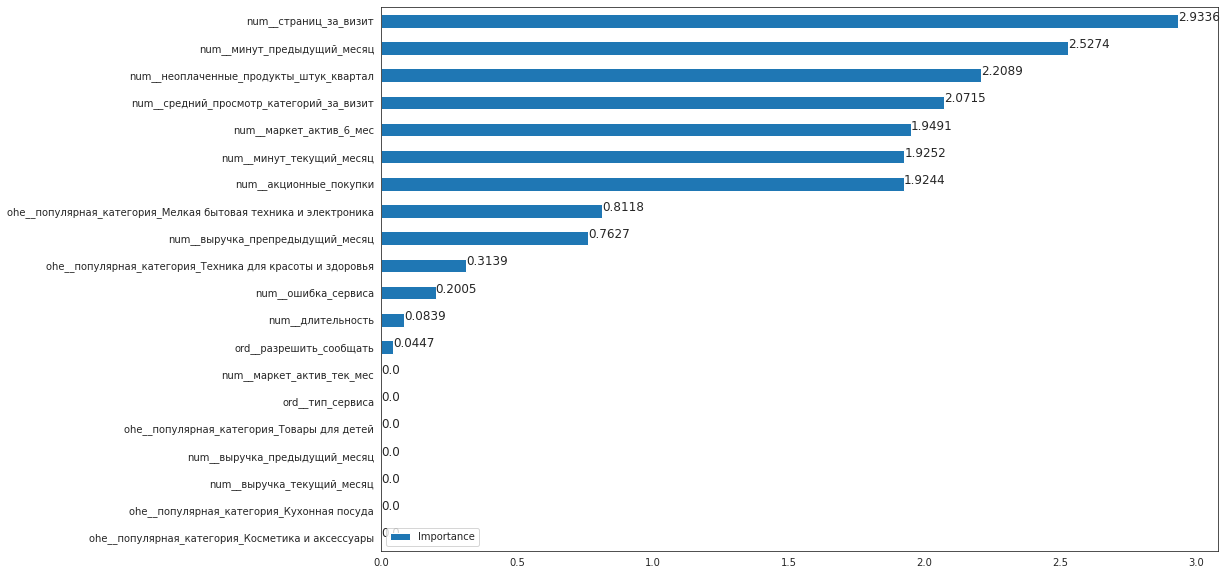

In [65]:
coefficients = best_model.coef_[0]
feature_importance = pd.DataFrame({'Feature': features_names, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10), ylabel='', xlabel='')
for index, value in enumerate(round(feature_importance['Importance'], 4)):
    plt.text(value, index, str(value), fontsize=12)
plt.show()

Так как лучшей моделью у нас оказалась модель LogisticRegression c L1-регуляризацией, она обнулила некоторые мало значимые признаки.

Сильнее всего на покупательскую активность влияют:
* среднее количество просмотренных страниц за визит;
* время проведенное на сайте;
* количество неоплаченных товаров в корзине;
* среднее количество просмотренных за визит категорий;
* среднемесячное количество маркетинговых коммуникаций;
* среднемесячная доля акционных покупок;
* популярная категория - мелкая бытовая техника и электроника;
* выручка за препредыдущий месяц.

Не оказывают влияния:
* маркетинговые коммуникации за текущий период (вероятно, их эффект может оказаться существенным в последующих месяцах);
* тип сервиса;
* популярные категории товары для детей, кухонная посуда, косметика и аксессуары;
* выручка за предыдущий и текущий месяцы.

Далее построим график общей значимости признаков с помощью метода SHAP.

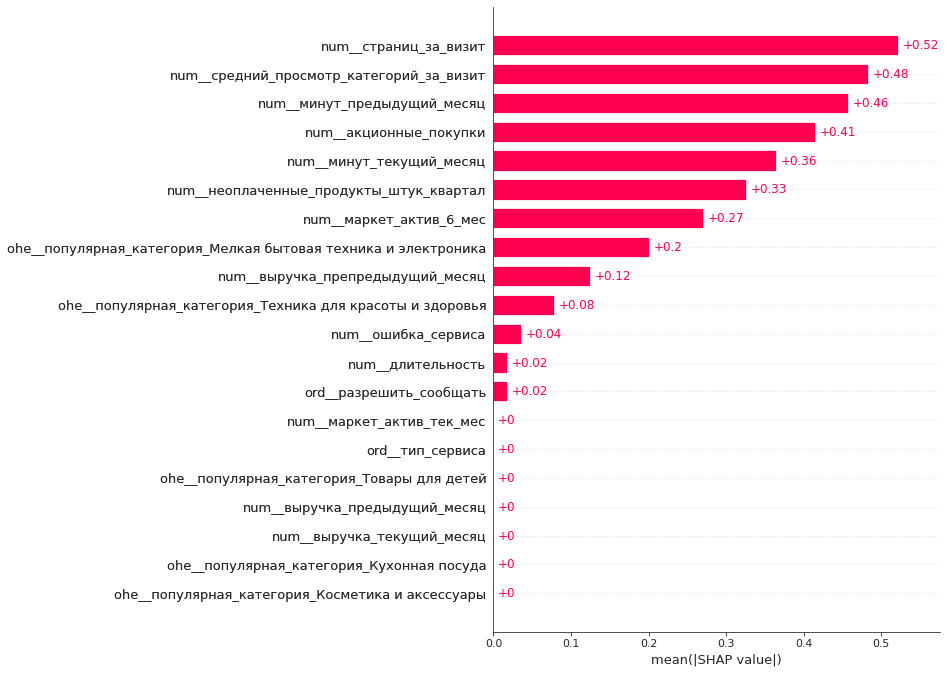

In [66]:
explainer = shap.LinearExplainer(
    best_model,
    X_test_transformed,
    feature_names=features_names
)
shap_values = explainer(X_test_transformed)
shap.plots.bar(shap_values, max_display=23) 

Порядок значимости признаков практически такой же, как и с коэффициентами. За исключением того, что среднее количество просмотренных за визит категорий и среднемесячная доля акционных покупок по шкале значимости SHAP стоят немного выше.

Теперь посмотрим, как признаки влияют на каждое предсказание модели.

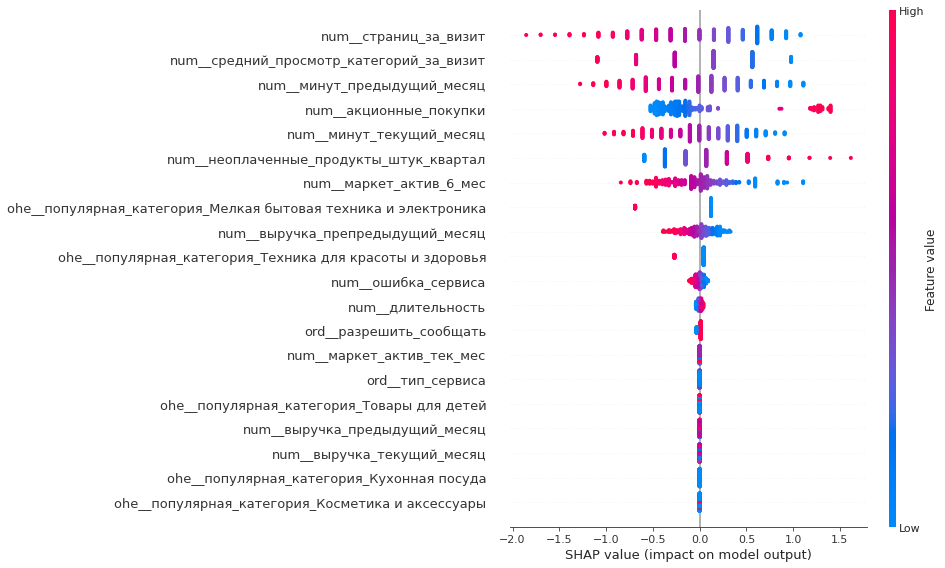

In [67]:
shap.plots.beeswarm(shap_values, max_display=None)

По графику видно, что модель склоняют в сторону класса 1 (покупательская активность снизилась): 
* **низкие значения** следующих признаков:
    * среднее количество просмотренных страниц за визит;
    * среднее количество просмотренных за визит категорий;
    * время проведенное на сайте;
    * среднемесячное количество маркетинговых коммуникаций;
    * выручка за препредыдущий месяц.

* **высокие значения** признаков:
    * среднемесячная доля акционных покупок;
    * количество неоплаченных товаров в корзине.

* а также, преобладание в популярной категории мелкой бытовой техники и электроники и техники для красоты и здоровья.

### Вывод:

Мало значимыми для модели являются следующие признаки:
* маркетинговые коммуникации за текущий период;
* тип сервиса;
* популярные категории товары для детей, кухонная посуда, косметика и аксессуары;
* выручка за предыдущий и текущий месяцы.

Cильнее всего на вероятность отнесения к классу 1 (покупательская активность снизилась) влияют:
* низкие значения количества просмотренных страниц за визит (ожидаемо, что активность пользователей, которые просматривают больше страниц и категорий, и больше проводят времени на сайте, скорее останется на прежнем уровне);
* низкие значения количества просмотренных за визит категорий;
* низкие значения времени, проведенного на сайте; 
* высокие значения доли акционных покупок (вероятно, есть покупатели, которых интересуют только акционные товары, а когда акция заканчивается, их активность снижается);
* высокие значения количества неоплаченных товаров в корзине;
* а также низкие значения количества маркетинговых коммуникаций (покупатели, получающие меньше рассылок, звонков и рекламы склонны к снижению активности).

Можно использовать эти наблюдения при моделировании (например, для отбора наиболее значимых признаков, для улучшения качества модели) и при принятии бизнес-решений:
* Так, когда клиент начинает накапливать в корзине неоплаченные товары, его активность может сократиться. Можно проанализировать такие "накопления" и спланировать маркетинговые акции с их учетом.
* Можно увеличить количество интересных предложений, тогда покупатель будет больше времени проводить на сайте и больше просматривать страниц и категорий.
* И можно понять, на какие действия не стоит тратить времени, так как они не окажут сильного влияние на покупательскую активность клиентов.

## 8. Сегментация покупателей

Выполним сегментацию покупателей, используя данные моделирования и данные о прибыли покупателей.

Выделим сегмент покупателей: <u>группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности</u>. Проанализируем его.

In [68]:
df = X.copy()

# Добавим в таблицу вероятности снижения покупательской активности
df['вероятность_снижения_активности'] = (best_model.predict_proba(
    grid_search.best_estimator_.named_steps['preprocessor'].transform(X))[:, 1])
df['покупательская_активность'] = label_encoder.transform(y)

# Добавим в таблицу данные о прибыли
df = df.join(money.set_index('id'), how='left')
df.head(5)

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,покупательская_активность,прибыль
id,,,,,,,,,,,,,,,,,,,
215349,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,0.836459,1,4.16
215350,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,0.333885,1,3.13
215351,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,0.735259,1,4.87
215352,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,0.930821,1,4.21
215353,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,0.600801,1,3.95


Построим диаграмму рассеяния между вероятностью снижения активности и долей акционных покупок.

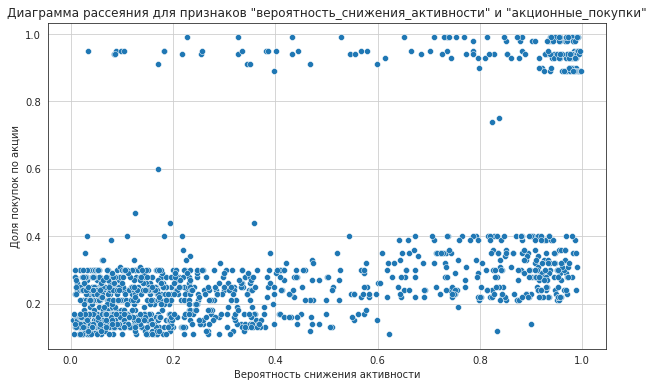

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df, x='вероятность_снижения_активности', y='акционные_покупки')
plt.title('Диаграмма рассеяния для признаков "вероятность_снижения_активности" и "акционные_покупки"')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Доля покупок по акции')
plt.grid()
plt.show()

На основе данного графика можно выделить сегмент с максимальной долей акционных покупок > 0.8 и высокой вероятностью снижения активности > 0.65.

In [70]:
df_analysis = df.query('акционные_покупки > 0.8 and вероятность_снижения_активности > 0.65')
df_rest = df.query('акционные_покупки <= 0.8 or вероятность_снижения_активности <= 0.65')

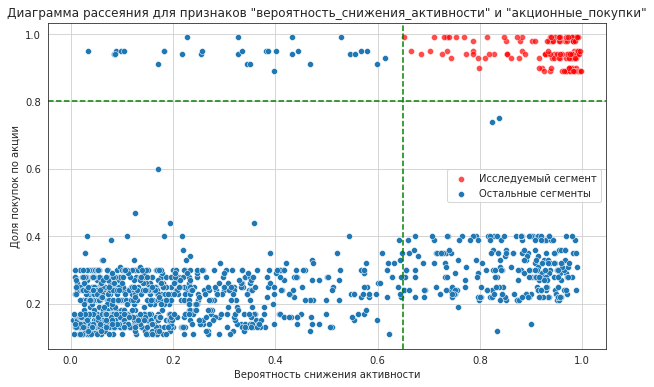

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_analysis, x='вероятность_снижения_активности', y='акционные_покупки', 
                label='Исследуемый сегмент', color='red', alpha=0.7)
sns.scatterplot(data = df_rest, x='вероятность_снижения_активности', y='акционные_покупки', 
                label='Остальные сегменты')
plt.title('Диаграмма рассеяния для признаков "вероятность_снижения_активности" и "акционные_покупки"')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Доля покупок по акции')
plt.axvline(x=0.65, color='green', linestyle='--')
plt.axhline(y=0.8, color='green', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [72]:
df_analysis.shape

(130, 19)

На основе анализа важности признаков SHAP составим список признаков со средней и высокой значимостью, также добавим в список прибыль и построим гистограммы для нашего сегмента. 

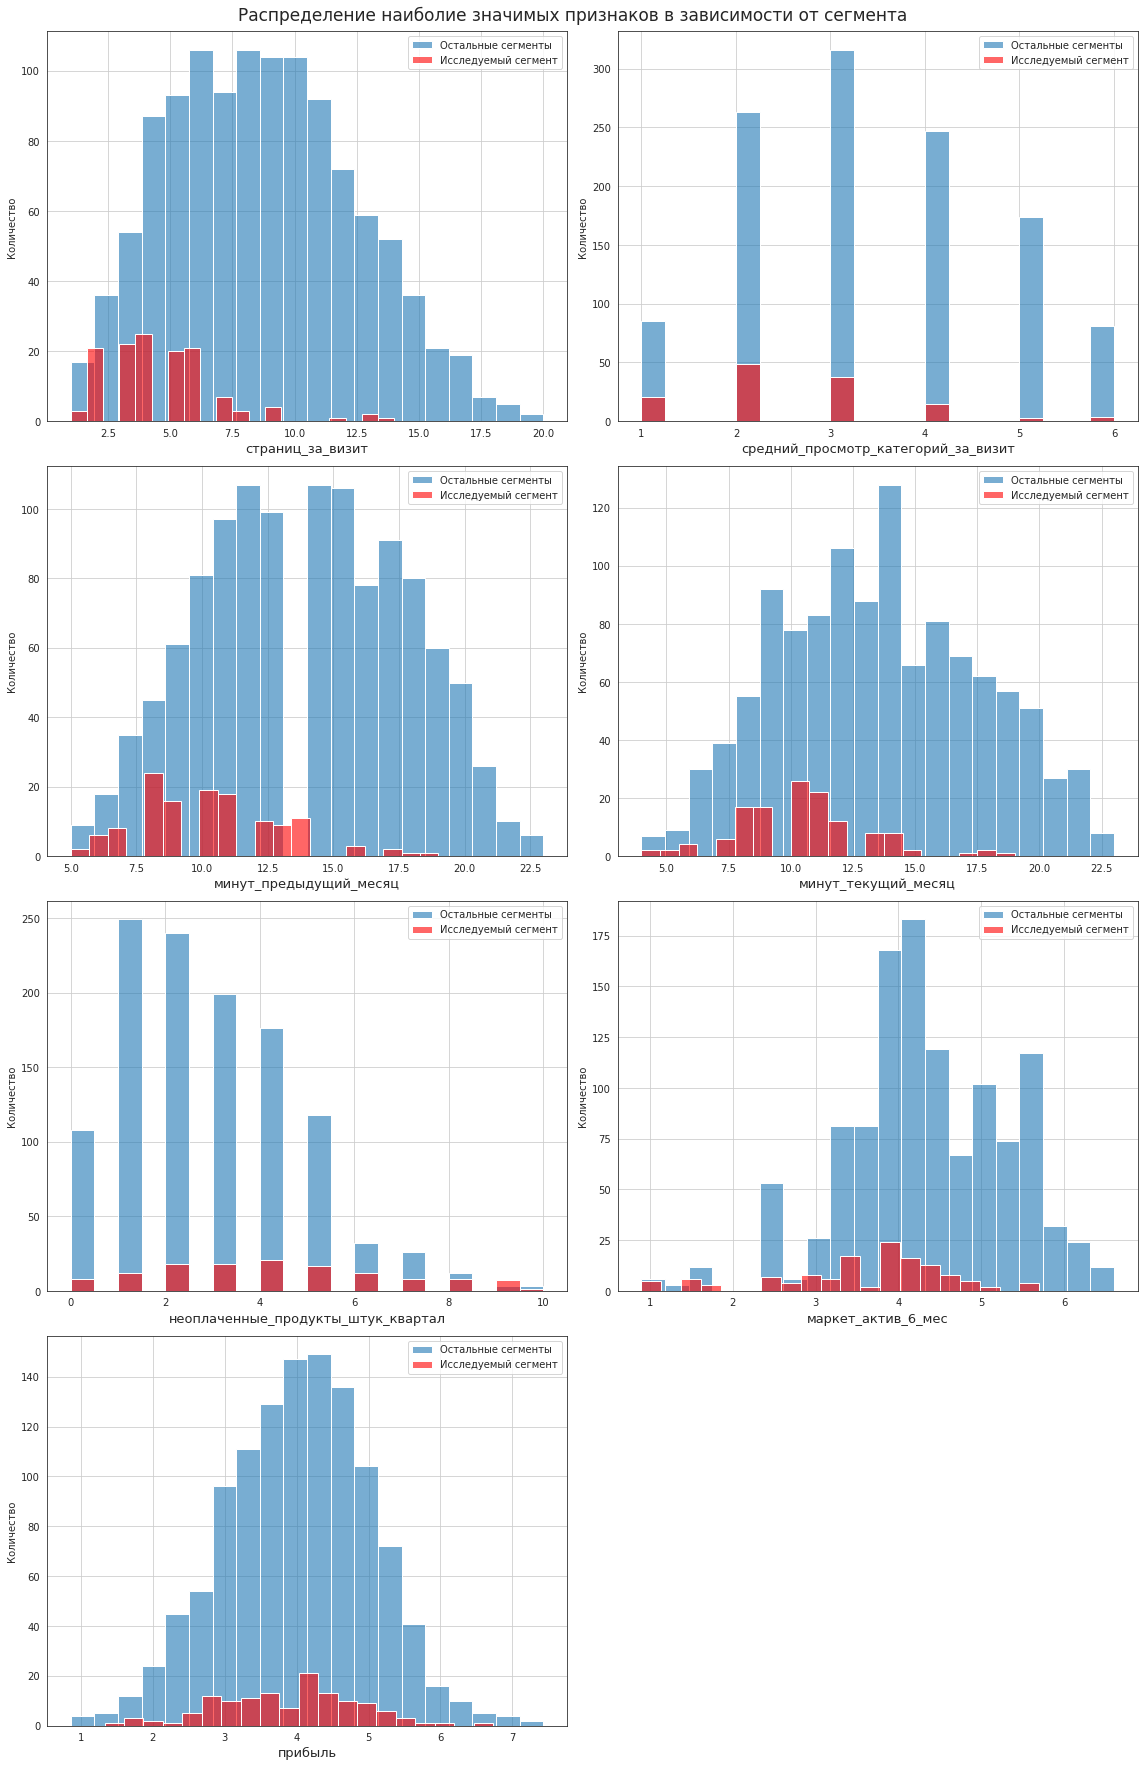

In [73]:
shap_features = ['страниц_за_визит', 'средний_просмотр_категорий_за_визит', 'минут_предыдущий_месяц',
                 'минут_текущий_месяц', 'неоплаченные_продукты_штук_квартал', 'маркет_актив_6_мес', 
                 'прибыль', 'популярная_категория']

plt.figure(figsize=(16, 25))
for i, feature in enumerate(shap_features[:-1], 1):
    plt.subplot(4, 2, i)
    sns.histplot(data=df_rest, x=feature, bins=20, alpha=0.6, label='Остальные сегменты')
    sns.histplot(data=df_analysis, x=feature, bins=20, color='red', alpha=0.6, label='Исследуемый сегмент')
    plt.xlabel(feature, fontsize=13)
    plt.ylabel('Количество')
    plt.grid()
    plt.legend()

plt.suptitle('Распределение наиболие значимых признаков в зависимости от сегмента\n', 
             fontsize=17)    
plt.tight_layout()    
plt.show()

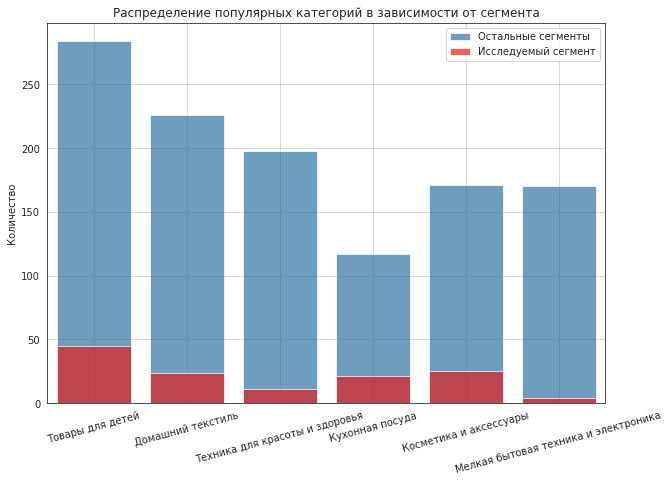

In [74]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_rest, x='популярная_категория', color='#1f77b4', alpha=0.7, label='Остальные сегменты')
sns.countplot(data=df_analysis, x='популярная_категория', color='r', alpha=0.7, label='Исследуемый сегмент')
plt.xlabel('')
plt.ylabel('Количество')
plt.xticks(rotation=15)
plt.title('Распределение популярных категорий в зависимости от сегмента')
plt.legend()
plt.grid()
plt.show()

In [75]:
pd.DataFrame({
    'Исследуемый сегмент': df_analysis[shap_features].median(),
    'Остальные сегменты': df_rest[shap_features].median()
})

,Исследуемый сегмент,Остальные сегменты
страниц_за_визит,4.000,8.000
средний_просмотр_категорий_за_визит,2.000,3.000
минут_предыдущий_месяц,10.000,14.000
минут_текущий_месяц,10.000,13.000
неоплаченные_продукты_штук_квартал,4.000,2.000
маркет_актив_6_мес,3.900,4.300
прибыль,4.025,4.055


### Вывод:

Был исследован сегмент покупателей: <u>**группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности**</u>.

Из полученных данных видно, что покупатели из исследуемого сегмента, в отличие от остальных клиентов:
* просматривают меньше страниц за визит (не более 14 страниц, а в среднем 4, тогда как у остальных клиентов - до 20 страниц, а в среднем - 8);
* просматривают меньше категорий товаров за визит (в среднем 2 категории, остальные - 3);
* проводят меньше времени на сайте (не более 19 минут, а в среднем - 10, остальные клиенты - до 23 минут, а в среднем - 13-14);
* оставляют в корзине больше неоплаченных товаров (до 10 товаров, а в среднем - 4 товара, остальные - в среднем 2);
* получали немного меньше маркетинговых коммуникаций (в среднем 3.9 и не более 5.7, остальные - до 6.6, а в среднем 4.3);
* есть небольшая разница в приносимой прибыли (до 6.7, а остальные - до 7.5);
* наиболее популярными категориями являются "товары для детей", "косметика и аксессуары" и "кухонная посуда".

Сильнее всего на покупательскую активность клиентов исследуемого сегмента влияют признаки, описывающие поведение покупателей на сайте (`'страниц_за_визит'`, `'минут_предыдущий_месяц'`, `'минут_текущий_месяц'`), более умеренное влияние оказывают признаки, описывающие продуктовое поведение покупателя (`'средний_просмотр_категорий_за_визит'`, `'неоплаченные_продукты_штук_квартал'`).

**Предложения для увеличения покупательской активности в сегменте:**
* Так как клиенты из исследуемого сегмента предпочитают покупать в основном акционные товары (то есть их привлекают сниженные цены), можно разработать систему скидок: например давать скидки покупателям, которые совершают покупки на определенную сумму в месяц, поддерживая тем самым их покупательскую активность на нужном уровне;
* Так как в корзинах клиентов исследуемого сегмента остается много неоплаченных товаров (возможно, они ждут, когда на эти товары появится акция, или, наоборот, акция закончилась раньше, чем клиент успел оформить покупку), можно анализировать такие "зависшие" товары и периодически (но не очень навязчиво) напоминать о них в рассылках;
* Чтобы увеличить заинтересованность клиентов, можно разработать рекомендательную систему по типу ссылок на похожие или сопутствующие товары, тогда клиент будет просматривать больше товаров и категорий и, возможно, больше покупать.
* Так как мы установили зависимость активности клиентов от маркетинговых коммуникаций, можно стараться поддерживать количество таких коммуникаций (рассылок, звонков, рекламы) на уровне 5-6 в месяц.
* Также, можно расширить ассортимент в наиболее популярных для данного сегмента категориях ("товары для детей", "косметика и аксессуары" и "кухонная посуда").

## Общий вывод

В рамках проекта по увеличению покупательской активности клиентов интернет-магазина были изучены данные о поведении покупателя на сайте, о коммуникациях с покупателем, его продуктовом поведении, о выручке и прибыли, которую получает магазин с покупателя и о времени (в минутах), которое покупатель провёл на сайте в течение исследуемого периода.

***Целью данного проекта*** было разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

В ходе исследования была проведена ***предобработка данных:***
* были проверены типы данных;
* были переименованы столбцы и приведены к единому стилю написания;
* данные были проверены на наличие пропущенных значений и дубликатов;
* были выявлены и удалены неявные дубликаты в датафрейме `market_file` в столбце `'тип_сервиса'`, а также исправлены орфографические ошибки в написании некоторых значений.

Мы провели ***исследовательский анализ данных***, в ходе которого изучили количественные и категориальные признаки и отобрали клиентов, покупательская активность которых составила не менее трёх месяцев.

Мы объединили данные из трех датасетов в один.

Также был проведен ***корреляционный анализ***:
* *высокая корреляция* у целевого признака `'покупательская_активность'`с признаком `'страниц_за_визит'` (коэф. корреляции - 0.75);
* *заметная корреляция* с признаками `'минут_предыдущий_месяц'` (0.69), `'минут_текущий_месяц'` (0.58), `'средний_просмотр_категорий_за_визит'` (0.54), `'маркет_актив_6_мес'` (0.54), `'акционные_покупки'` (0.51), `'выручка_препредыдущий_месяц'` (0.50);
* *умеренная корреляция* с признаками `'неоплаченные_продукты_штук_квартал'` (0.41), `'популярная_категория'` (0.30);
* *корреляция отсутствует* с признаками `'маркет_актив_тек_мес'` и `'разрешить_сообщать'`.
* *Мультиколлинеарности* между входными признаками не наблюдается, так как все абсолютные значения коэффициентов корреляции меньше 0.9.

В процессе ***поиска лучшей модели*** было сделано следующее:
* Во время подготовки данных был использован ColumnTransformer(). Количественные и категориальные признаки были обработаны в пайплайне раздельно. Для кодирования категориальных признаков использовались кодировщики OneHotEncoder(), OrdinalEncoder() и LabelEncoder(), для масштабирования количественных — StandardScaler() и MinMaxScaler().
* с помощью инструмента GridSearchCV() были обучены следующие модели с разными параметрами:
    * KNeighborsClassifier()
    * DecisionTreeClassifier();
    * LogisticRegression();
    * SVC().
* В качестве метрики качества была выбрана метрика `roc_auc`, так как у нас есть дисбаланс в распределении целевого признака. А ROC-AUC — это площадь под ROC-кривой, которая показывает зависимость TPR (доли верно классифицированных объектов класса 1) и FPR (доля неверно классифицированных объектов класса 0), поэтому она не зависит от дисбаланса.
* Был использован один общий пайплайн для всех моделей и подбора гиперпараметров. И GridSearchCV() вернул **лучшую модель**: 
    * LogisticRegression();
    * c L1-регуляризацией и силой регуляризации С=0.5;
    * целевой признак закодирован с помощью LabelEncoder();
    * категориальные признаки закодированы с помощью OneHotEncoder() и OrdinalEncoder();
    * количественные признаки масштабированы с помощью MinMaxScaler().
    * Метрика ROC-AUC на тренировочной выборке: 0.8991
    * Метрика ROC-AUC на тестовой выборке: 0.9196
    
При помощи ***анализа важности признаков SHAP*** было выяснено следующее:

Мало значимыми для модели являются признаки:
* маркетинговые коммуникации за текущий период;
* тип сервиса;
* популярные категории товары для детей, кухонная посуда, косметика и аксессуары;
* выручка за предыдущий и текущий месяцы.

Cильнее всего на вероятность отнесения к классу 1 (покупательская активность снизилась) влияют:
* низкие значения количества просмотренных страниц за визит (ожидаемо, что активность пользователей, которые просматривают больше страниц и категорий, и больше проводят времени на сайте, скорее останется на прежнем уровне);
* низкие значения количества просмотренных за визит категорий;
* низкие значения времени, проведенного на сайте; 
* высокие значения доли акционных покупок (вероятно, есть покупатели, которых интересуют только акционные товары, а когда акция заканчивается, их активность снижается);
* высокие значения количества неоплаченных товаров в корзине;
* а также низкие значения количества маркетинговых коммуникаций (покупатели, получающие меньше рассылок, звонков и рекламы склонны к снижению активности).

Можно использовать эти наблюдения при принятии бизнес-решений:
* Так, когда клиент начинает накапливать в корзине неоплаченные товары, его активность может сократиться. Можно проанализировать такие "накопления" и спланировать маркетинговые акции с их учетом.
* Можно увеличить количество интересных предложений, тогда покупатель будет больше времени проводить на сайте и больше просматривать страниц и категорий.
* И можно понять, на какие действия не стоит тратить времени, так как они не окажут сильного влияние на покупательскую активность клиентов.

Также была проведена ***сегментация покупателей***.
Был исследован сегмент покупателей: <u>**группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности**</u>.

В ходе анализа исследуемого сегмента мы выяснили, что покупатели из исследуемого сегмента, в отличие от остальных клиентов:
* просматривают меньше страниц за визит (не более 14 страниц, а в среднем 4, тогда как у остальных клиентов - до 20 страниц, а в среднем - 8);
* просматривают меньше категорий товаров за визит (в среднем 2 категории, остальные - 3);
* проводят меньше времени на сайте (не более 19 минут, а в среднем - 10, остальные клиенты - до 23 минут, а в среднем - 13-14);
* оставляют в корзине больше неоплаченных товаров (до 10 товаров, а в среднем - 4 товара, остальные - в среднем 2);
* получали немного меньше маркетинговых коммуникаций (в среднем 3.9 и не более 5.7, остальные - до 6.6, а в среднем 4.3);
* есть небольшая разница в приносимой прибыли (до 6.7, а остальные - до 7.5);
* наиболее популярными категориями являются "товары для детей", "косметика и аксессуары" и "кухонная посуда".

Сильнее всего на покупательскую активность клиентов исследуемого сегмента влияют признаки, описывающие поведение покупателей на сайте (`'страниц_за_визит'`, `'минут_предыдущий_месяц'`, `'минут_текущий_месяц'`), более умеренное влияние оказывают признаки, описывающие продуктовое поведение покупателя (`'средний_просмотр_категорий_за_визит'`, `'неоплаченные_продукты_штук_квартал'`).

По итогам данного исследования можно сформулировать следующие **предложения для увеличения покупательской активности в сегменте:**
* Так как клиенты из исследуемого сегмента предпочитают покупать в основном акционные товары (то есть их привлекают сниженные цены), можно разработать систему скидок: например давать скидки покупателям, которые совершают покупки на определенную сумму в месяц, поддерживая тем самым их покупательскую активность на нужном уровне;
* Так как в корзинах клиентов исследуемого сегмента остается много неоплаченных товаров (возможно, они ждут, когда на эти товары появится акция, или, наоборот, акция закончилась раньше, чем клиент успел оформить покупку), можно анализировать такие "зависшие" товары и периодически (но не очень навязчиво) напоминать о них в рассылках;
* Чтобы увеличить заинтересованность клиентов, можно разработать рекомендательную систему по типу ссылок на похожие или сопутствующие товары, тогда клиент будет просматривать больше товаров и категорий и, возможно, больше покупать.
* Так как мы установили зависимость активности клиентов от маркетинговых коммуникаций, можно стараться поддерживать количество таких коммуникаций (рассылок, звонков, рекламы) на уровне 5-6 в месяц.
* Также, можно расширить ассортимент в наиболее популярных для данного сегмента категориях ("товары для детей", "косметика и аксессуары" и "кухонная посуда").